# Plotting and Visualization

In [17]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## A Brief matplotlib API Primer

Up till now we have been learning to work with data that is represented as tables. Whether it is a spreadsheet, a DataFrame or a CSV file all those datasets developed around a table representation. Because a table neatly organizes values into rows and columns, we can easily look up specific values at the intersection of a row value and a column value. This structure is handy and efficient to work with data but as the data gets bigger it is hard to grasp it's content, patterns and meaning unless we opt for a different representation such as visulisation.

This week, we'll learn the basics of data visualization, a discipline that focuses on the visual representation of data. As humans, our brains have evolved to develop powerful visual processing capabilities. We can quickly find patterns in the visual information we encounter, which was incredibly important from a survivability standpoint. Unfortunately, when data is represented as tables of values, we can't really take advantage of our visual pattern matching capabilities. This is because our ability to quickly process symbolic values (like numbers and words) is very poor. Data visualization focuses on transforming data from table representations to visual ones.



Over time, __matplotlib__ has produced a number of add-on toolkits for data visualisation that uses the main matplotlib package for their underlying plotting. By the end of today's lesson, if we are left with time, we will cover one of those add-on packages known as __seaborn__. 

__matplotlib__ is a huge and fairly complex package. There is not enough time during this course to give a comprehensive treatement to the breadth and depth of its functionality. It is just enough to get started. For in depth understanding refer to the online documentation.

In [21]:
import matplotlib.pyplot as  plt 
import numpy as np

The following line is only required in Jupyter note book to get the interactive plotting working

In [22]:
%matplotlib notebook

In [23]:

data = np.arange(10)
data


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


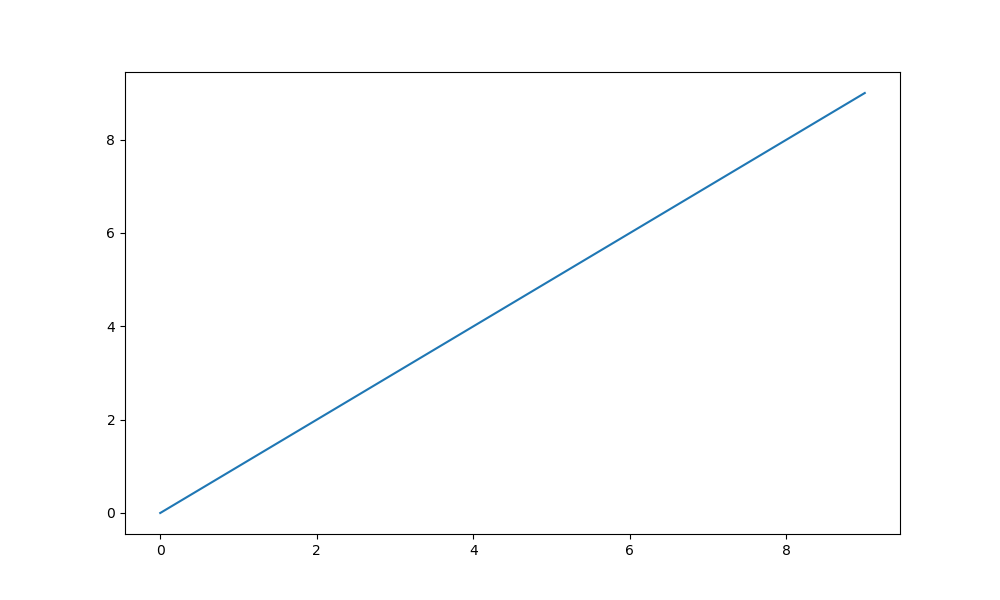

In [24]:
plt.plot(data)

If a line appeared it means you are setup to take advantage of matplotlib.

### Figures and Subplots

In [ ]:
fig = plt.figure()

In [ ]:
ax1 = fig.add_subplot(2, 2, 1)

In [ ]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [ ]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [ ]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [ ]:
plt.close('all')

In [ ]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

ax.plot(x, y, 'g--')

ax.plot(x, y, linestyle='--', color='g')

In [ ]:
plt.figure()

In [ ]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [ ]:
plt.close('all')

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [ ]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [ ]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### Adding legends

In [ ]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [ ]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [ ]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [ ]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib Configuration

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## Plotting with pandas and seaborn

### Line Plots

In [ ]:
plt.close('all')

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
np.random.seed(12348)

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [ ]:
plt.figure()

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
plt.close('all')

In [ ]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [ ]:
plt.close('all')

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.density()

In [ ]:
plt.figure()

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [ ]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

In [ ]:
plt.figure()

In [ ]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

In [ ]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion